In [6]:
import pandas as pd

# Load the CSV file (no header since Hive doesn't include it)
df = pd.read_csv('insurance_results.csv', header=None)

# assign column names
df.columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

# view the data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.9240
1,18,male,33.770,1,no,southeast,1725.5522
2,28,male,33.000,3,no,southeast,4449.4620
3,33,male,22.705,0,no,northwest,21984.4700
4,32,male,28.880,0,no,northwest,3866.8552


In [10]:
# Check missing values
print(df.isnull().sum())

# Quick stats
print(df.describe())

# Example: Standardize categorical variables (if needed)
df['sex'] = df['sex'].str.lower().map({'male': 'Male', 'female': 'Female'})

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422274
std      14.049960     6.098187     1.205493  12110.011244
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287000
50%      39.000000    30.400000     1.000000   9382.032500
75%      51.000000    34.693750     2.000000  16639.912250
max      64.000000    53.130000     5.000000  63770.430000


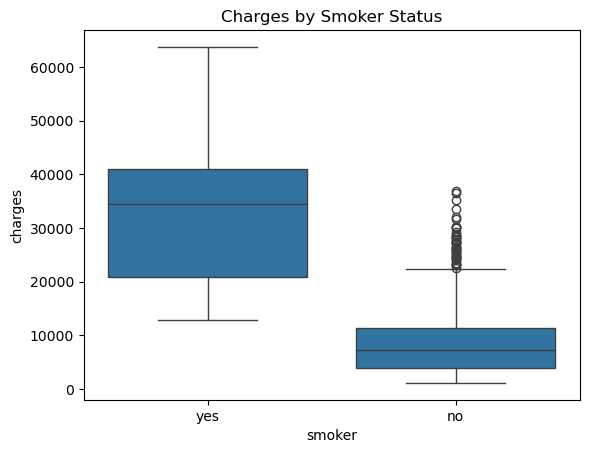

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Charges distribution by smoker
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoker Status')
plt.show()


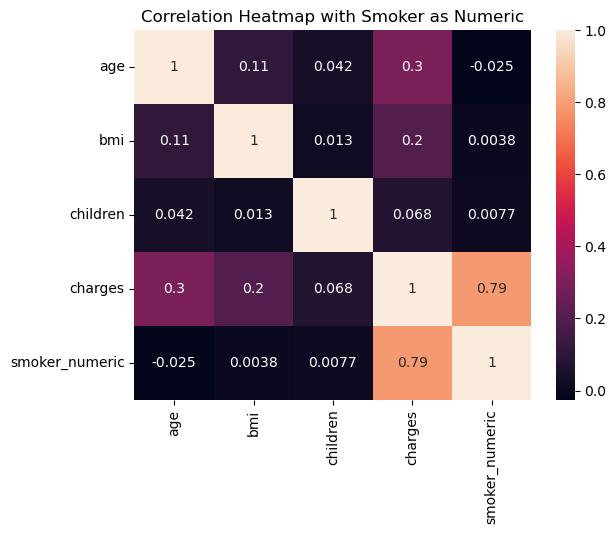

In [14]:
#convert categorical to numeric first
df['smoker_numeric'] = df['smoker'].map({'yes': 1, 'no': 0})

# Now include this column in correlation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True)
plt.title('Correlation Heatmap with Smoker as Numeric')
plt.show()


In [19]:
from scipy.stats import ttest_ind

smoker_charges = df[df['smoker']=='yes']['charges']
non_smoker_charges = df[df['smoker']=='no']['charges']
t_stat, p_val = ttest_ind(smoker_charges, non_smoker_charges)

print(f"T-test p-value: {p_val}")


T-test p-value: 8.271476899938698e-283
